In [11]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

theta = np.linspace(0,1,11)

def normalize(vec):
    s = np.sum(vec)
    return vec/s if s>0 else vec

def likelihood(theta, k, n):
    return (theta**k) * ((1-theta)**(n-k))

def posterior(prior,theta, k, n):
    like = likelihood(theta, k, n)
    unnorm = prior * like
    post = normalize(unnorm)
    return like, post, unnorm

def make_prior_extremes():
    p = np.zeros_like(theta)
    p[0] = 0.5
    p[-1] = 0.5
    return normalize(p)

def make_prior_uniform():
    return np.ones_like(theta)/len(theta)

def make_prior_peak_at(theta_center, spike=0.9):
    p = np.ones_like(theta)*1e-12
    idx = np.argmin(np.abs(theta - theta_center))
    p[idx] = spike
    rest = 1-spike
    for i in range(len(theta)):
        if i!=idx:
            p[i] = rest/(len(theta)-1)
    return normalize(p)

def make_prior_gaussian(center, sigma):
    un = np.exp(-0.5*((theta-center)/sigma)**2)
    return normalize(un)

def plot_case(prior, k, n, title):
    like, post, _ = posterior(prior,theta, k, n)
    like_n = normalize(like)
    plt.figure()
    plt.plot(theta, prior, marker='o', label='prior')
    plt.plot(theta, like_n, marker='s', label='likelihood (norm)')
    plt.plot(theta, post, marker='^', label='posterior')
    plt.title(title)
    plt.xlabel("theta")
    plt.legend()
    plt.show()


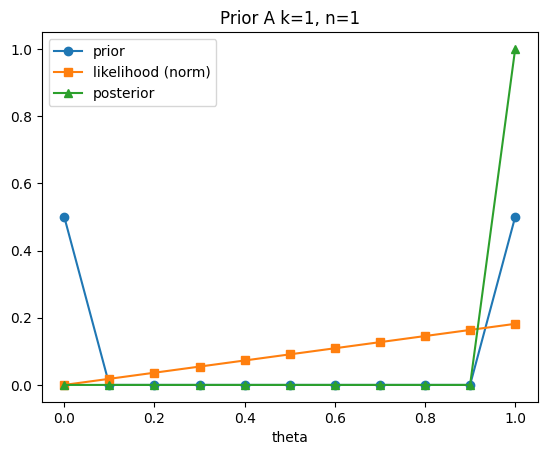

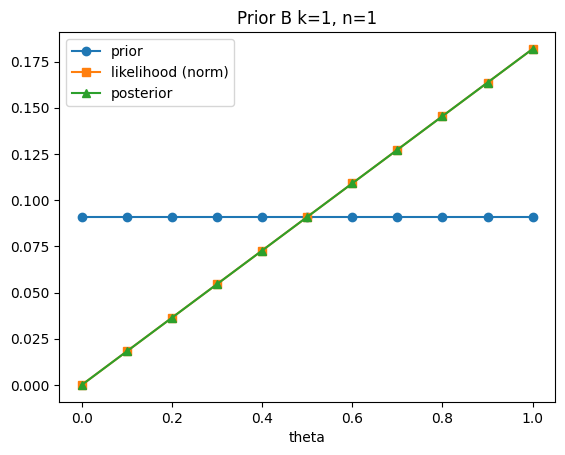

k,n = 1 1
Posterior mean A: 1.0
Posterior mean B: 0.6999999999999998
P(θ =0.4|Data) under Prior A= 0.0
P(θ =0.4|Data) under Prior B= 0.07272727272727272
P(θ =0.6|Data) under Prior A= 0.0
P(θ =0.6|Data) under Prior B= 0.10909090909090909
With one data point the prior A can dominate. Prior A forces the posterior to an extreme (theta=1), while the uniform prior yields a smooth posterior that favors larger theta but is not certain.


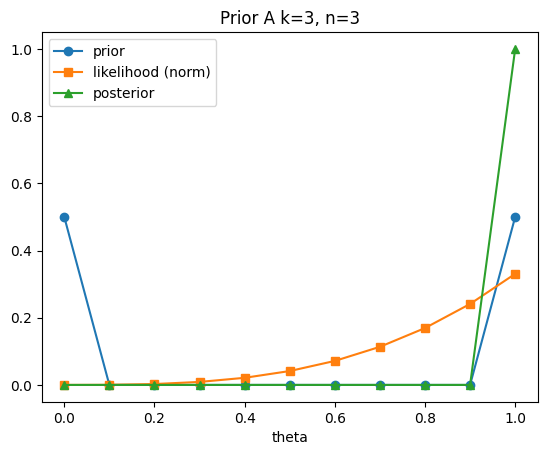

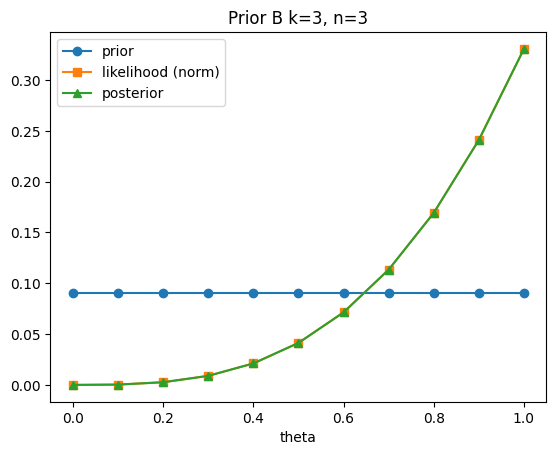

k,n = 3 3
Posterior mean A: 1.0
Posterior mean B: 0.8374545454545456
with more informative data (3 heads) the uniform posterior moves strongly toward 1. Prior A forces the posterior to an extreme (theta=1). Therfore with more data the posterior mena closes on to 1


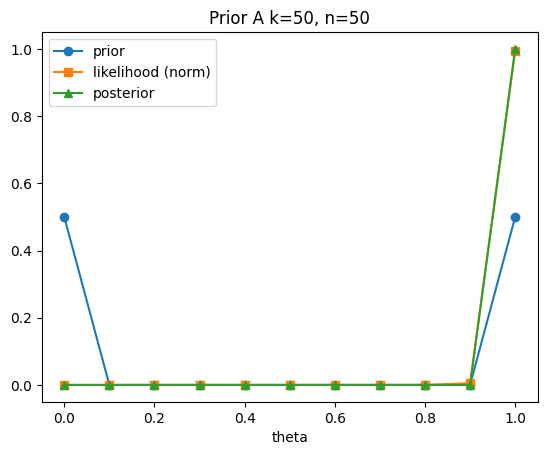

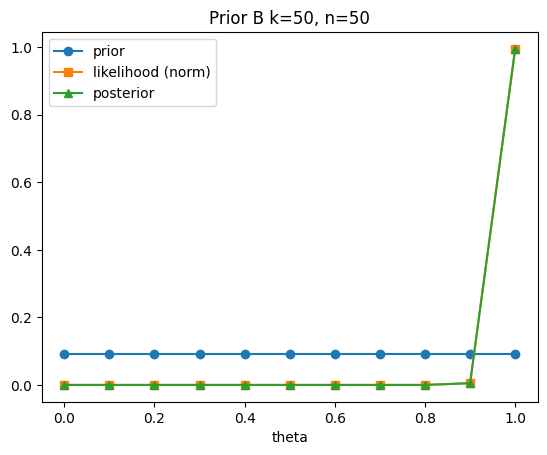

k,n = 50 50
Posterior mean A: 1.0
Posterior mean B: 0.9994844270998631
P(θ ≥ 0.9 | data) under Prior B= 0.9999857830047042
Under Prior A, P(θ ≥ 0.9 | data) = 1.0


In [ ]:
# Problem 1 (i) 
priorA = make_prior_extremes()
priorB = make_prior_uniform()

k,n = 1,1

plot_case(priorA,k,n,f"Prior A k={k}, n={n}")
plot_case(priorB,k,n,f"Prior B k={k}, n={n}")
_,postA,_ = posterior(priorA,theta, k, n)
_,postB,_ = posterior(priorB,theta, k, n)
print("k,n =",k,n)
print("Posterior mean A:",np.sum(theta*postA))
print("Posterior mean B:",np.sum(theta*postB))
print("P(θ =0.4|Data) under Prior A=",postA[4])
print("P(θ =0.4|Data) under Prior B=",postB[4])
print("P(θ =0.6|Data) under Prior A=",postA[6])
print("P(θ =0.6|Data) under Prior B=",postB[6])
print("With one data point the prior A can dominate. Prior A forces the posterior to an extreme (theta=1), while the uniform prior yields a smooth posterior that favors larger theta but is not certain.")

# Problem 1 (ii)

k,n = 3,3

plot_case(priorA,k,n,f"Prior A k={k}, n={n}")
plot_case(priorB,k,n,f"Prior B k={k}, n={n}")
_,postA,_ = posterior(priorA,theta, k, n)
_,postB,_ = posterior(priorB,theta, k, n)
print("k,n =",k,n)
print("Posterior mean A:",np.sum(theta*postA))
print("Posterior mean B:",np.sum(theta*postB))
print("with more informative data (3 heads) the uniform posterior moves strongly toward 1. Prior A forces the posterior to an extreme (theta=1). Therfore with more data the posterior mena closes on to 1")    

# Problem 1 (iii)

k,n = 50,50

plot_case(priorA,k,n,f"Prior A k={k}, n={n}")
plot_case(priorB,k,n,f"Prior B k={k}, n={n}")
_,postA,_ = posterior(priorA,theta, k, n)
_,postB,_ = posterior(priorB,theta, k, n)
print("k,n =",k,n)
print("Posterior mean A:",np.sum(theta*postA))
print("Posterior mean B:",np.sum(theta*postB))
print("P(θ ≥ 0.9|Data) under Prior B=",np.sum(postB[-2:]))
print("Under Prior A, P(θ ≥ 0.9|Data) =",np.sum(postA[-2:]))

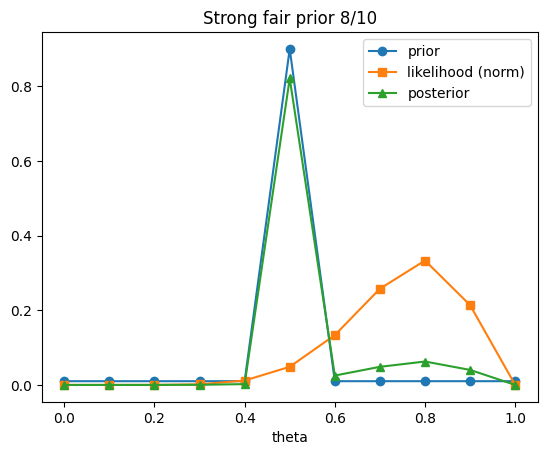

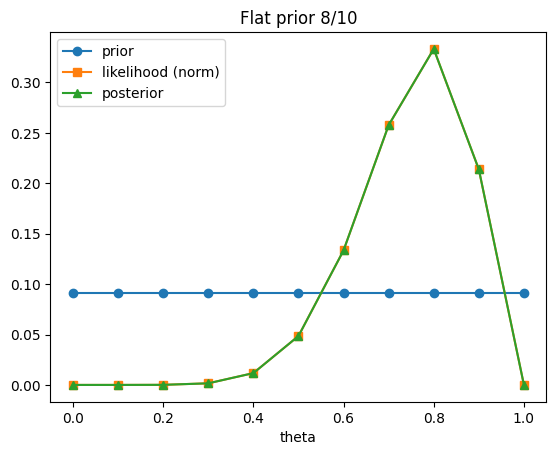

Posterior mean strong: 0.5468093825581238
Posterior mean flat: 0.7488395747199169


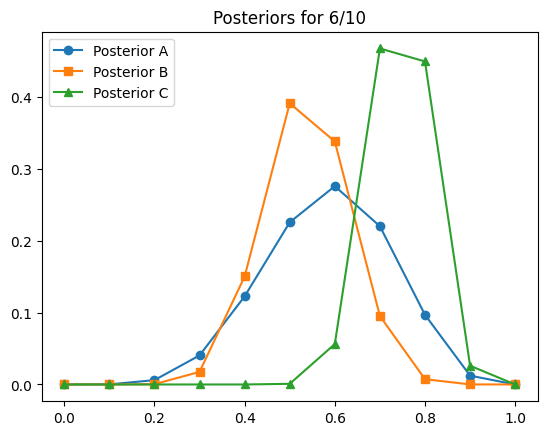

MLE: 0.6
Posterior mean A: 0.5833635061180013
Posterior mean B: 0.5364270777645305
Posterior mean C: 0.7443413855966997


In [ ]:
# Problem 2 (i): 8/10 with strong fair prior
k,n = 8,10
prior_strong = make_prior_peak_at(0.5,0.9)
prior_flat = make_prior_uniform()
plot_case(prior_strong,k,n,"Strong fair prior 8/10")
plot_case(prior_flat,k,n,"Flat prior 8/10")
_,postS,_ = posterior(prior_strong,theta, k,n)
_,postF,_ = posterior(prior_flat,theta, k,n)
print("Posterior mean strong:",np.sum(theta*postS))
print("Posterior mean flat:",np.sum(theta*postF))
print("Although the data indicates a bias toward heads (8/10), the strong prior centered at 0.5 pulls the posterior substantially toward 0.5 (posterior mean 0.5468 vs 0.7488 for flat). That demonstrates how a concentrated prior can \"resist\" moderate but not overwhelming data.")

# Problem 2 (ii): 6/10 with three priors
k,n = 6,10
pA = make_prior_uniform()
pB = make_prior_gaussian(0.5,0.12)
pC = make_prior_gaussian(0.8,0.08)

_,postA,_ = posterior(pA,theta,k,n)
_,postB,_ = posterior(pB,theta,k,n)
_,postC,_ = posterior(pC,theta,k,n)

plt.figure()
plt.plot(theta,postA,marker='o',label='Posterior A')
plt.plot(theta,postB,marker='s',label='Posterior B')
plt.plot(theta,postC,marker='^',label='Posterior C')
plt.legend()
plt.title("Posteriors for 6/10")
plt.show()

print("MLE:",k/n)
print("Posterior mean A:",np.sum(theta*postA))
print("Posterior mean B:",np.sum(theta*postB))
print("Posterior mean C:",np.sum(theta*postC))
print("Prior C (skewed toward 0.8) has the biggest influence (largest shift away from the data MLE), B also pulls the posterior toward 0.5 (but less than C pushes it toward 0.8). The flat prior changes the posterior least.")